# Ryerson University $~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $~~~~~~~~~~~~~~~~~~~~~~~~$ Laboratory of Innovations in Transportation (LiTans)
$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ 
$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$
$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ 
$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ 

# <center> <font color='royalblue'> “Impacts of the COVID-19 Pandemic on Ridesourcing Services in Small Towns and Large Cities”</font> </center> 

# <center> <font color='royalblue'> Part Three: Direct Demand Model </font> </center> 


$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ 
$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

# <center>Nael Alsaleh & Bilal Farooq </center>
$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$
# January 2022

<hr style="border:2px solid gray"> </hr>

# Inputs

1. Modelling dataset that includes all the variables shown below.

Med_Income_Orig, Pop_den_Orig, Per_Male_Orig, Working_age_Orig, Elderly_Orig, Avg_Hhold_Orig, Married_Orig, HighSchool_higher_Orig, Bachelor_Higher_Orig, 
Commute_PC_Orig, Com_LU_Orig, Gov_LU_Orig, Ind_LU_Orig, Parks_LU_Orig, Res_LU_Orig, Med_Income_Des, Pop_den_Des, Per_Male_Des, Per_Male_Des, Working_age_Des, Elderly_Des, Avg_Hhold_Des, Married_Des, HighSchool_higher_Des, Bachelor_Higher_Des, Commute_PC_Des, Com_LU_Des, Gov_LU_Des, Ind_LU_Des, Parks_LU_Des, Res_LU_Des, Avgerage_Temp, Precipitation, Snow', Cases, Deaths, Hospitalizations, Positive_Rate, Partially_Vaccinated, Fully_Vaccinated, Stringency_Index, Year, Month, Day_of_week, Weekend, and trips.  

# Dependencies

In order to run this code successfully, you will need to:
1. Latest version of Python
2. Installing the required libraries.

# Implementation

The implementation of the direct demand model has been divided into two parts:

1. Modelling
2. Model Interpretation

<hr style="border:2px solid gray"> </hr>

# <font color='forestgreen'> Part 1. Modelling </font>

A) Import the required packages

In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

B) Import the Training Data

In [2]:
columns=['Med_Income_Orig', 'Pop_den_Orig', 'Per_Male_Orig','Working_age_Orig', 'Elderly_Orig', 'Avg_Hhold_Orig', 'Married_Orig','HighSchool_higher_Orig', 'Bachelor_Higher_Orig', 
'Commute_PC_Orig', 'Com_LU_Orig', 'Gov_LU_Orig', 'Ind_LU_Orig', 'Parks_LU_Orig', 'Res_LU_Orig', 'Med_Income_Des', 'Pop_den_Des', 'Per_Male_Des', 'Per_Male_Des', 'Working_age_Des', 'Elderly_Des', 'Avg_Hhold_Des', 
'Married_Des', 'HighSchool_higher_Des', 'Bachelor_Higher_Des', 'Commute_PC_Des', 'Com_LU_Des', 'Gov_LU_Des', 'Ind_LU_Des', 'Parks_LU_Des', 'Res_LU_Des', 'Avgerage_Temp', 'Precipitation', 'Snow', 'Cases', 'Deaths',                 
'Hospitalizations', 'Positive_Rate', 'Partially_Vaccinated', 'Fully_Vaccinated', 'Stringency_Index', 'Year', 'Month', 'Day_of_week', 'Weekend', 'trips']

# Define the type of the variables
dtype={
        'Med_Income_Orig': float,
        'Pop_den_Orig':float,
        'Per_Male_Orig':float,
        'Working_age_Orig':float,
        'Elderly_Orig':float,
        'Avg_Hhold_Orig':float,
        'Married_Orig':float,
        'HighSchool_higher_Orig':float,
        'Bachelor_Higher_Orig':float,
        'Commute_PC_Orig':float,
        'Com_LU_Orig':float,
        'Gov_LU_Orig':float,
        'Ind_LU_Orig':float,
        'Parks_LU_Orig':float,
        'Res_LU_Orig':float,
        'Med_Income_Des':float,
        'Pop_den_Des':float,
        'Per_Male_Des':float,
        'Working_age_Des':float,
        'Elderly_Des':float,
        'Avg_Hhold_Des':float,
        'Married_Des':float,
        'HighSchool_higher_Des':float,
        'Bachelor_Higher_Des':float,
        'Commute_PC_Des':float,
        'Com_LU_Des':float,
        'Gov_LU_Des':float,
        'Ind_LU_Des':float,
        'Parks_LU_Des':float,
        'Res_LU_Des':float, 
        'Avgerage_Temp': float,
        'Snow': float,
        'Precipitation': float,
        'Cases': int,
        'Deaths': int,
        'Hospitalizations': int,
        'Positive_Rate': float,
        'Partially_Vaccinated': float,
        'Fully_Vaccinated': float,
        'Stringency_Index': float,
        'Year':float,
        'Month': float,
        'Day_of_week': float,
        'Weekend': float,
        'trips': float
      }

Chunck = pd.read_csv('Direct_Demand_Data.csv',chunksize=3000000,usecols= columns, dtype = dtype)
Modelling_Data = pd.concat(Chunck)

In [3]:
X = Modelling_Data[['Med_Income_Orig', 'Pop_den_Orig', 'Per_Male_Orig','Working_age_Orig', 'Elderly_Orig', 'Avg_Hhold_Orig', 'Married_Orig', 'Bachelor_Higher_Orig', 
'Commute_PC_Orig', 'Com_LU_Orig', 'Gov_LU_Orig', 'Ind_LU_Orig', 'Parks_LU_Orig', 'Res_LU_Orig', 'Med_Income_Des',  'Pop_den_Des', 'Per_Male_Des', 'Working_age_Des', 'Elderly_Des', 'Avg_Hhold_Des', 
'Married_Des', 'Bachelor_Higher_Des', 'Commute_PC_Des', 'Com_LU_Des', 'Gov_LU_Des', 'Ind_LU_Des', 'Parks_LU_Des', 'Res_LU_Des', 'Avgerage_Temp', 'Precipitation', 'Snow', 'Cases', 'Deaths',                 
'Hospitalizations', 'Positive_Rate', 'Partially_Vaccinated', 'Fully_Vaccinated', 'Stringency_Index', 'Year', 'Month', 'Day_of_week', 'Weekend']]

X = StandardScaler().fit_transform(X)
Y = Modelling_Data['trips']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state = 1)

# Print the shape of training and testing datasets
print (X_Train.shape)
print (Y_Train.shape)
print (X_Test.shape)
print (Y_Test.shape)

(4, 42)
(4,)
(1, 42)
(1,)


C) Find the optimum Hyperparameters for the Trip Distribution Model (Random Forest Model) using Bayesian Optimization Method

In [6]:
# Define the space
space = {'criterion': hp.choice('criterion', ['squared_error', 'absolute_error']),
        'max_depth': hp.quniform('max_depth', 10, 150, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2']),
        'min_samples_leaf': hp.uniform ('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 100, 150, 300]),
        'max_leaf_nodes' : hp.choice('max_leaf_nodes', [10, 50, 100, None]),
        'bootstrap' : hp.choice('bootstrap', [True, False])
         }
#Define the Objective function
def objective(space):
    model = RandomForestRegressor(criterion = space['criterion'], 
                                  max_depth = space['max_depth'],
                                  max_features = space['max_features'],
                                  min_samples_leaf = space['min_samples_leaf'],
                                  min_samples_split = space['min_samples_split'],
                                  n_estimators = space['n_estimators'],
                                  max_leaf_nodes =space['max_leaf_nodes'],
                                  bootstrap = space['bootstrap'],
                                 )
    

    scores = cross_val_score(model, X_Train, Y_Train, cv = 5, scoring='neg_mean_squared_error').mean()  # Note that CV should be changed if you are running 
    #return scores.mean()
    return {'loss': - scores, 'status': STATUS_OK }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 65,
            trials= trials)
best

100%|██████████| 65/65 [00:06<00:00,  9.82trial/s, best loss: 3.375]


{'bootstrap': 0,
 'criterion': 0,
 'max_depth': 50.0,
 'max_features': 0,
 'max_leaf_nodes': 1,
 'min_samples_leaf': 0.2170852019465705,
 'min_samples_split': 0.3535431257362075,
 'n_estimators': 0}

D)  Apply the optimal  architectures  of  the  algorithms  on  the  testing  set

In [7]:
crit = {0: 'squared_error', 1: 'absolute_error'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2'}
est = {0: 10, 1: 50, 2: 100, 3: 150, 4: 300}
leaf_node = {0: 10, 1: 50, 2: 100, 3: None}
boot = {0: True, 1: False}


trainedforest = RandomForestRegressor( criterion = crit[best['criterion']], 
                                       max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']], 
                                       max_leaf_nodes = leaf_node[best['max_leaf_nodes']],
                                       bootstrap = boot[best['bootstrap']],
                                      ).fit(X_Train,Y_Train)

predictionforest = trainedforest.predict(X_Test)

y_true = Y_Test 
y_pred = predictionforest 

# Obtain the main performance metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
print('R^2:', metrics.r2_score(y_true, y_pred))

Mean Absolute Error (MAE): 4.1
Mean Squared Error (MSE): 16.81
Root Mean Squared Error (RMSE): 4.1
R^2: nan


/Users/naelalsaleh/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


# <font color='forestgreen'> Part 2: Model Interpretation Using SHAP (SHapley  Additive  exPlanations)</font>

  0%|          | 0/1 [00:00<?, ?it/s]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
100%|██████████| 1/1 [00:00<00:00, 10.17it/s]


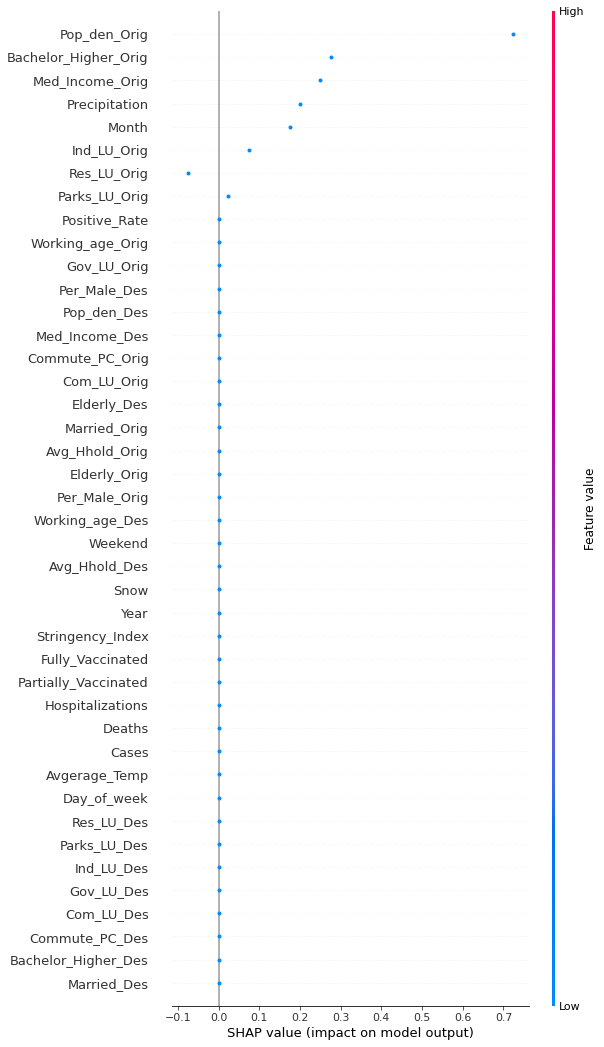

In [9]:
X_Test_new = pd.DataFrame(X_Test, columns = ['Med_Income_Orig', 'Pop_den_Orig', 'Per_Male_Orig','Working_age_Orig', 'Elderly_Orig', 'Avg_Hhold_Orig', 'Married_Orig', 'Bachelor_Higher_Orig', 
'Commute_PC_Orig', 'Com_LU_Orig', 'Gov_LU_Orig', 'Ind_LU_Orig', 'Parks_LU_Orig', 'Res_LU_Orig', 'Med_Income_Des',  'Pop_den_Des', 'Per_Male_Des', 'Working_age_Des', 'Elderly_Des', 'Avg_Hhold_Des', 
'Married_Des', 'Bachelor_Higher_Des', 'Commute_PC_Des', 'Com_LU_Des', 'Gov_LU_Des', 'Ind_LU_Des', 'Parks_LU_Des', 'Res_LU_Des', 'Avgerage_Temp', 'Precipitation', 'Snow', 'Cases', 'Deaths',                 
'Hospitalizations', 'Positive_Rate', 'Partially_Vaccinated', 'Fully_Vaccinated', 'Stringency_Index', 'Year', 'Month', 'Day_of_week', 'Weekend'])

import shap
X_train_summary = shap.kmeans(X_Train, 4)

# using the kmeans summary
rf_explainer_ = shap.KernelExplainer(trainedforest.predict,X_train_summary)

rf_shap_values_ = rf_explainer_.shap_values(X_Test_new.iloc[0:1000])

shap.summary_plot(rf_shap_values_, X_Test_new.iloc[0:1000], show=False, max_display=X.shape[1])